In [1]:
import pandas as pd 
import numpy as np
from sqlalchemy import create_engine, text
from sqlalchemy import URL
from sqlalchemy import create_engine

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

import plotly.express as px
import plotly.graph_objects as go
from PIL import Image
from IPython.display import Image
from wordcloud import WordCloud, STOPWORDS

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
def create_table(username, password,db_name):
    url_object = URL.create(
        "mysql+mysqlconnector",
        username=username,
        password=password,
        host="localhost",
        database=db_name
    )
    return create_engine(url_object)

In [3]:
engine = create_table('user1', 'asdfgh', 'SuperStore')

In [4]:
query = """
SELECT Sales, Quantity,  discount, Profit, `Shipping Cost`,`Product Name`, p.Category, p.`Sub-Category`,Market, `Ship Mode`,Segment, COALESCE(returned, 0) AS returned
FROM order_detail
JOIN product p ON order_detail.`Product ID` = p.`Product ID`
JOIN shipping s ON order_detail.`Order ID` = s.`Order ID`
JOIN `order` o ON o.`Order ID` = order_detail.`Order ID`
JOIN customer c ON o.`Customer ID` = c.`Customer ID`
LEFT JOIN returned r ON order_detail.`Order ID` = r.`Order ID`
"""


df=pd.DataFrame(engine.connect().execute(text(query)))

In [5]:
df

,Sales,Quantity,discount,Profit,Shipping Cost,Product Name,Category,Sub-Category,Market,Ship Mode,Segment,returned
0,2309.650,7,0.0,762.1850,933.570,Plantronics CS510 - Over-the-Head monaural Wir...,Technology,Accessories,US,Same Day,Consumer,0
1,1090.780,7,0.4,-290.8750,348.180,"Bevis Round Bullnose 29"" High Table Top",Furniture,Tables,US,Same Day,Consumer,0
2,19.440,3,0.0,9.3312,7.240,Xerox 212,Office Supplies,Paper,US,Same Day,Consumer,0
3,344.682,2,0.1,34.4220,65.350,"Brother Fax and Copier, Laser",Technology,Copiers,APAC,Second Class,Corporate,1
4,133.920,5,0.1,-6.0300,41.640,"Rogers Folders, Wire Frame",Office Supplies,Storage,APAC,Second Class,Corporate,1
...,...,...,...,...,...,...,...,...,...,...,...,...
49665,9.612,2,0.7,-21.1680,0.020,"Sanford Highlighters, Easy-Erase",Office Supplies,Art,Africa,Standard Class,Corporate,0
49666,84.000,5,0.0,9.2000,0.019,"Green Bar Message Books, Multicolor",Office Supplies,Paper,LATAM,First Class,Consumer,0
49667,26.940,2,0.0,1.8600,0.010,"Eaton Parchment Paper, Premium",Office Supplies,Paper,APAC,Same Day,Corporate,0
49668,58.050,5,0.1,19.9500,0.010,"Avery Binder, Economy",Office Supplies,Binders,APAC,Standard Class,Home Office,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49670 entries, 0 to 49669
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sales          49670 non-null  float64
 1   Quantity       49670 non-null  int64  
 2   discount       49670 non-null  float64
 3   Profit         49670 non-null  float64
 4   Shipping Cost  49670 non-null  float64
 5   Product Name   49670 non-null  object 
 6   Category       49670 non-null  object 
 7   Sub-Category   49670 non-null  object 
 8   Market         49670 non-null  object 
 9   Ship Mode      49670 non-null  object 
 10  Segment        49670 non-null  object 
 11  returned       49670 non-null  int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 4.5+ MB


In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import MaxAbsScaler

columns_to_scale = [ 'Profit', 'Shipping Cost','Quantity']

scaler = QuantileTransformer()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
df.head(5)

,Sales,Quantity,discount,Profit,Shipping Cost,Product Name,Category,Sub-Category,Market,Ship Mode,Segment,returned
0,2309.650,0.912412,0.0,0.993973,1.000000,Plantronics CS510 - Over-the-Head monaural Wir...,Technology,Accessories,US,Same Day,Consumer,0
1,1090.780,0.912412,0.4,0.012849,0.993867,"Bevis Round Bullnose 29"" High Table Top",Furniture,Tables,US,Same Day,Consumer,0
2,19.440,0.513514,0.0,0.498498,0.485736,Xerox 212,Office Supplies,Paper,US,Same Day,Consumer,0
3,344.682,0.296296,0.1,0.733760,0.909830,"Brother Fax and Copier, Laser",Technology,Copiers,APAC,Second Class,Corporate,1
4,133.920,0.782783,0.1,0.186089,0.852568,"Rogers Folders, Wire Frame",Office Supplies,Storage,APAC,Second Class,Corporate,1


In [8]:
import category_encoders as ce
encoder = ce.BaseNEncoder(cols=['Category','Market','Product Name','Ship Mode','Sub-Category','Segment'], base=3)
df_encoded = encoder.fit_transform(df)
df_encoded.head(10)

,Sales,Quantity,discount,Profit,Shipping Cost,Product Name_0,Product Name_1,Product Name_2,Product Name_3,Product Name_4,...,Sub-Category_0,Sub-Category_1,Sub-Category_2,Market_0,Market_1,Ship Mode_0,Ship Mode_1,Segment_0,Segment_1,returned
0,2309.650,0.912412,0.0,0.993973,1.000000,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
1,1090.780,0.912412,0.4,0.012849,0.993867,0,0,0,0,0,...,0,0,2,0,1,0,1,0,1,0
2,19.440,0.513514,0.0,0.498498,0.485736,0,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0
3,344.682,0.296296,0.1,0.733760,0.909830,0,0,0,0,0,...,0,1,1,0,2,0,2,0,2,1
4,133.920,0.782783,0.1,0.186089,0.852568,0,0,0,0,0,...,0,1,2,0,2,0,2,0,2,1
5,3709.400,0.973473,0.1,0.012927,1.000000,0,0,0,0,0,...,0,2,0,0,2,0,2,0,2,1
6,70.794,0.296296,0.1,0.680776,0.574074,0,0,0,0,0,...,0,0,1,0,2,0,2,0,2,1
7,5175.170,0.973473,0.1,0.996148,0.999974,0,0,0,0,0,...,0,2,1,0,2,1,0,0,1,0
8,16.038,0.296296,0.1,0.227870,0.225225,0,0,0,0,0,...,0,2,2,0,2,1,0,0,1,0
9,27.270,0.000000,0.1,0.492946,0.165165,0,0,0,0,0,...,0,2,2,0,2,1,0,0,1,0


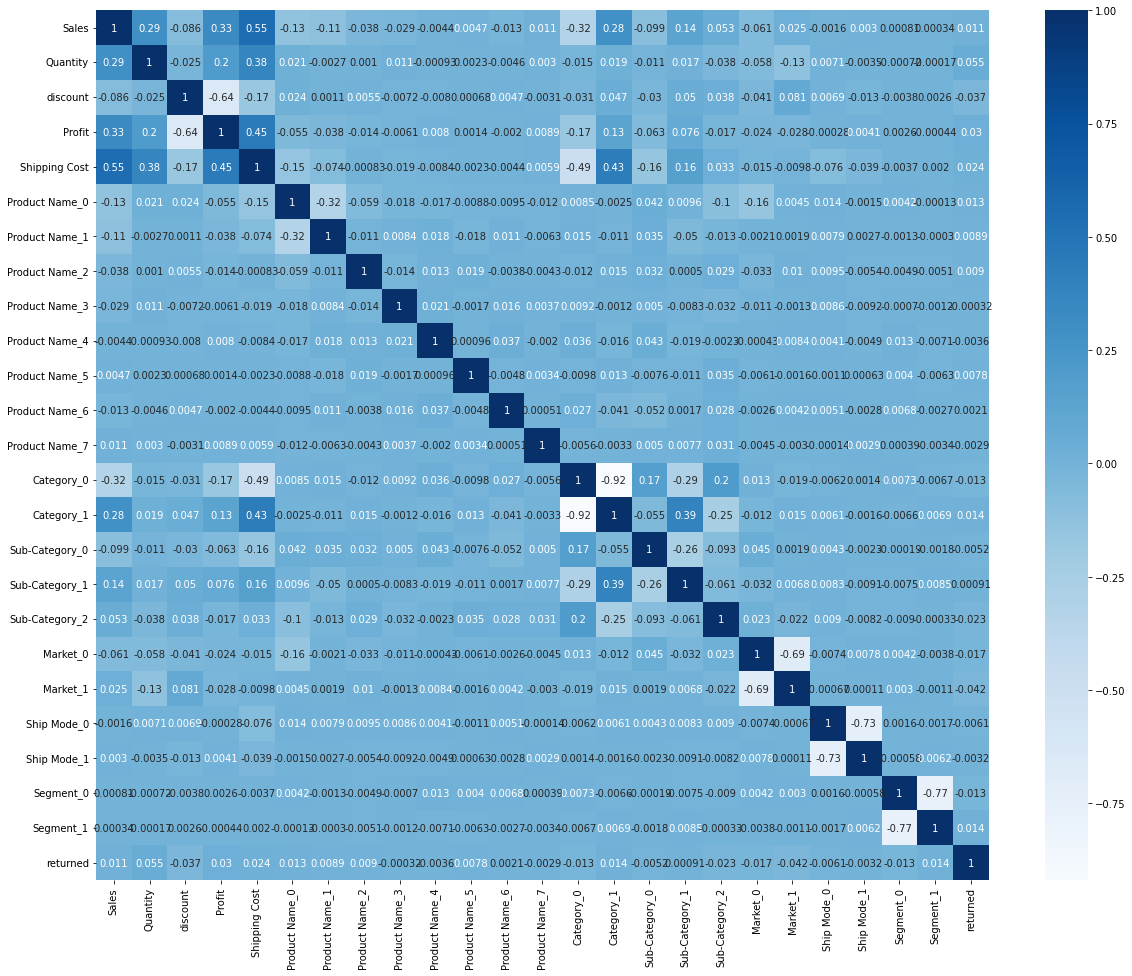

In [9]:
plt.figure(figsize=(20,16))
sns.heatmap(df_encoded.corr(),annot=True,cmap='Blues');

In [10]:
X = df_encoded.drop(["Profit"],axis=1)
y = df_encoded['Profit']


In [11]:
from sklearn.model_selection import train_test_split

# Splitting data into train, validation and test sets with ratio of 80:10:10
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2,random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)


# XGBRegressor 

In [12]:
from xgboost import XGBRegressor 

model_xgb = XGBRegressor(n_estimators=100, max_depth=10,learning_rate=0.199, random_state=0)
model_xgb.fit(X_train, y_train)

# Finally, predict on test data
pred_test_xgb = model_xgb.predict(X_val)

r2_test_xgb = r2_score(y_val, pred_test_xgb).round(4)
mse_test_xgb = mean_squared_error(y_val, pred_test_xgb).round(4)
rmse_test_xgb = np.sqrt(mean_squared_error(y_val, pred_test_xgb)).round(4)
mae_test_xgb = mean_absolute_error(y_val, pred_test_xgb).round(4)

print(f'\033[94m')
print('R2 Score  : ', r2_test_xgb)
print(f'\033[92m')
print('MSE       : ', mse_test_xgb)
print('RMSE      : ', rmse_test_xgb)
print('MAE       : ', mae_test_xgb)



R2 Score  :  0.7613

MSE       :  0.0199
RMSE      :  0.1409
MAE       :  0.0892


# RandomForestRegressor

In [14]:
from sklearn.ensemble import RandomForestRegressor

model_RandomForestRegressor = RandomForestRegressor(n_estimators=100, max_depth=60, max_features=35, random_state=0)
model_RandomForestRegressor.fit(X_train, y_train)

# Finally, predict on test data
pred_test_RandomForestRegressor = model_RandomForestRegressor.predict(X_val)

r2_test_RandomForestRegressor = r2_score(y_val, pred_test_RandomForestRegressor).round(4)
mse_test_RandomForestRegressor = mean_squared_error(y_val, pred_test_RandomForestRegressor).round(4)
rmse_test_RandomForestRegressor = np.sqrt(mean_squared_error(y_val, pred_test_RandomForestRegressor)).round(4)
mae_test_RandomForestRegressor = mean_absolute_error(y_val, pred_test_RandomForestRegressor).round(4)


print(f'\033[94m')
print('R2 Score : ', r2_test_RandomForestRegressor)
print(f'\033[92m')
print('MSE      : ', mse_test_RandomForestRegressor)
print('RMSE     : ', rmse_test_RandomForestRegressor)
print('MAE      : ', mae_test_RandomForestRegressor)


R2 Score  :  0.7471

MSE       :  0.021
RMSE      :  0.1451
MAE       :  0.0938


# HistGradientBoostingRegressor

In [15]:
from sklearn.ensemble import HistGradientBoostingRegressor

model_HistGradientBoostingRegressor = HistGradientBoostingRegressor()
model_HistGradientBoostingRegressor.fit(X_train, y_train)

# Finally, predict on test data
pred_test_HistGradientBoostingRegressor = model_HistGradientBoostingRegressor.predict(X_val)

r2_test_HistGradientBoostingRegressor = r2_score(y_val, pred_test_HistGradientBoostingRegressor).round(4)
mse_test_HistGradientBoostingRegressor = mean_squared_error(y_val, pred_test_HistGradientBoostingRegressor).round(4)
rmse_test_HistGradientBoostingRegressor = np.sqrt(mean_squared_error(y_val, pred_test_HistGradientBoostingRegressor)).round(4)
mae_test_HistGradientBoostingRegressor = mean_absolute_error(y_val, pred_test_HistGradientBoostingRegressor).round(4)

print(f'\033[94m')
print('R2 Score  : ', r2_test_HistGradientBoostingRegressor)
print(f'\033[92m')
print('MSE       : ', mse_test_HistGradientBoostingRegressor)
print('RMSE      : ', rmse_test_HistGradientBoostingRegressor)
print('MAE       : ', mae_test_HistGradientBoostingRegressor)


R2 Score  :  0.7342

MSE       :  0.0221
RMSE      :  0.1487
MAE       :  0.0993


# ExtraTreesRegressor

In [16]:
from sklearn.ensemble import ExtraTreesRegressor

model_ExtraTreesRegressor = ExtraTreesRegressor(n_estimators=100,criterion="friedman_mse" , bootstrap=True, random_state=0)
model_ExtraTreesRegressor.fit(X_train, y_train)

# Finally, predict on test data
pred_test_ExtraTreesRegressor = model_ExtraTreesRegressor.predict(X_val)

r2_test_ExtraTreesRegressor = r2_score(y_val, pred_test_ExtraTreesRegressor).round(4)
mse_test_ExtraTreesRegressor = mean_squared_error(y_val, pred_test_ExtraTreesRegressor).round(4)
rmse_test_ExtraTreesRegressor = np.sqrt(mean_squared_error(y_val, pred_test_ExtraTreesRegressor)).round(4)
mae_test_ExtraTreesRegressor= mean_absolute_error(y_val, pred_test_ExtraTreesRegressor).round(4)

print(f'\033[94m')
print('R2 Score  : ', r2_test_ExtraTreesRegressor)
print(f'\033[92m')
print('MSE       : ', mse_test_ExtraTreesRegressor)
print('RMSE      : ', rmse_test_ExtraTreesRegressor)
print('MAE       : ', mae_test_ExtraTreesRegressor)


R2 Score  :  0.7426

MSE       :  0.0214
RMSE      :  0.1463
MAE       :  0.099


# AdaBoostRegressor

In [17]:
from sklearn.ensemble import AdaBoostRegressor

model_AdaBoostRegressor = AdaBoostRegressor(n_estimators=50, learning_rate=0.1999,random_state=0)
model_AdaBoostRegressor.fit(X_train, y_train)

# Finally, predict on test data
pred_test_AdaBoostRegressor = model_AdaBoostRegressor.predict(X_val)

r2_test_AdaBoostRegressor = r2_score(y_val, pred_test_AdaBoostRegressor).round(4)
mse_test_AdaBoostRegressor = mean_squared_error(y_val, pred_test_AdaBoostRegressor).round(4)
rmse_test_AdaBoostRegressor = np.sqrt(mean_squared_error(y_val, pred_test_AdaBoostRegressor)).round(4)
mae_test_AdaBoostRegressor= mean_absolute_error(y_val, pred_test_AdaBoostRegressor).round(4)

print(f'\033[94m')
print('R2 Score  : ', r2_test_AdaBoostRegressor)
print(f'\033[92m')
print('MSE       : ', mse_test_AdaBoostRegressor)
print('RMSE      : ', rmse_test_AdaBoostRegressor)
print('MAE       : ', mae_test_AdaBoostRegressor)



R2 Score  :  0.6392

MSE       :  0.03
RMSE      :  0.1733
MAE       :  0.1324


In [18]:
models = pd.DataFrame({
    
    'Model': [
        'XGBRegressor', 'RandomForestRegressor',
        'HistGradientBoostingRegressor', 'ExtraTreesRegressor',
        'AdaBoostRegressor'
    ],
    
    'R2 Score': [
        r2_test_xgb, r2_test_RandomForestRegressor,
        r2_test_HistGradientBoostingRegressor, r2_test_ExtraTreesRegressor,
        r2_test_AdaBoostRegressor
    
    ],
    
    'MSE': [
        mse_test_xgb, mse_test_RandomForestRegressor,
        mse_test_HistGradientBoostingRegressor, mse_test_ExtraTreesRegressor,
        mse_test_AdaBoostRegressor
    ],
    
    'RMSE': [
         rmse_test_xgb, rmse_test_RandomForestRegressor,
        rmse_test_HistGradientBoostingRegressor, rmse_test_ExtraTreesRegressor,
        rmse_test_AdaBoostRegressor
    ],
    
    'MAE': [
         mae_test_xgb, mae_test_RandomForestRegressor,
         mae_test_HistGradientBoostingRegressor, mae_test_ExtraTreesRegressor,
         mae_test_AdaBoostRegressor
    ]
    
})


In [19]:
models

,Model,R2 Score,MSE,RMSE,MAE
0,XGBRegressor,0.7613,0.0199,0.1409,0.0892
1,RandomForestRegressor,0.7471,0.0210,0.1451,0.0938
2,HistGradientBoostingRegressor,0.7342,0.0221,0.1487,0.0993
3,ExtraTreesRegressor,0.7426,0.0214,0.1463,0.0990
4,AdaBoostRegressor,0.6392,0.0300,0.1733,0.1324


In [20]:
models.sort_values(by='R2 Score', ascending=False).style.background_gradient(
        cmap='coolwarm').hide_index().set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

Model,R2 Score,MSE,RMSE,MAE
XGBRegressor,0.761300,0.019900,0.140900,0.089200
RandomForestRegressor,0.747100,0.021000,0.145100,0.093800
ExtraTreesRegressor,0.742600,0.021400,0.146300,0.099000
HistGradientBoostingRegressor,0.734200,0.022100,0.148700,0.099300
AdaBoostRegressor,0.639200,0.030000,0.173300,0.132400


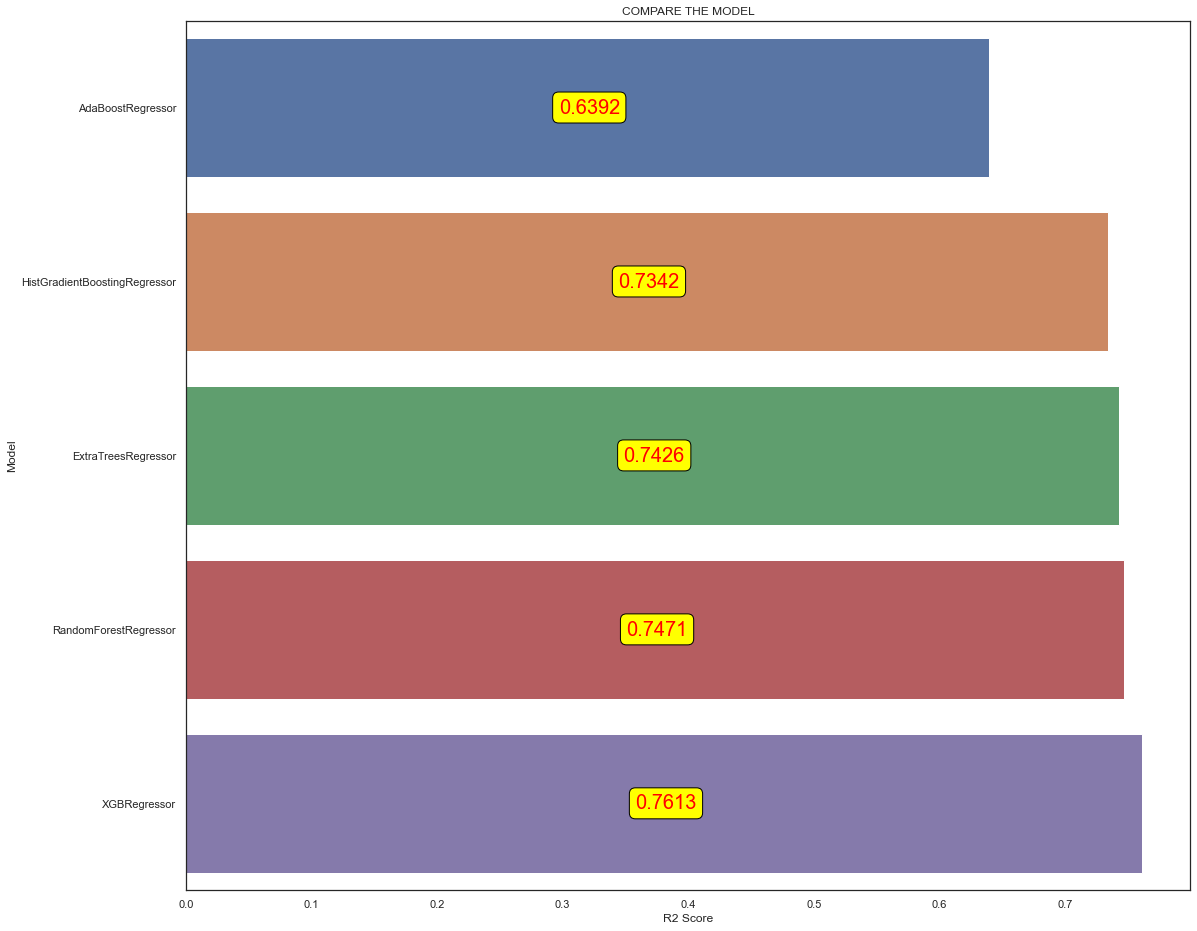

In [21]:
p = plt.figure(figsize=(18,16))

p = sns.set_theme(style="white")

p= models=models.sort_values(by='R2 Score',ascending=True)[:20]

p = sns.barplot(y= 'Model', x= 'R2 Score', data= models)

for container in p.containers:
    p.bar_label(container,label_type = 'center',padding = 2,size = 20,color = "Red",rotation = 0,
    bbox={"boxstyle": "round", "pad": 0.3, "facecolor": "yellow", "edgecolor": "black", "alpha": 1})
plt.title('COMPARE THE MODEL')
plt.xlabel('R2 Score')
plt.ylabel('Model');

# Best Performing Model : XGBRegressor 

In [22]:
print(f'\033[94m')
prediction = model_xgb.predict(X_test)
print(prediction)


[0.23349543 0.65127605 0.88248175 ... 0.957047   0.0780937  0.18129876]


In [23]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction})
cross_checking.head()

,Actual,Predicted
27865,0.118190,0.233495
8530,0.044596,0.651276
13542,0.956780,0.882482
8895,0.798739,0.737568
24541,0.522083,0.451925


In [24]:
cross_checking['Error'] = cross_checking['Actual'] - cross_checking['Predicted']
cross_checking.head()

,Actual,Predicted,Error
27865,0.118190,0.233495,-0.115305
8530,0.044596,0.651276,-0.606680
13542,0.956780,0.882482,0.074299
8895,0.798739,0.737568,0.061171
24541,0.522083,0.451925,0.070158


In [25]:
cross_checking_final  = cross_checking[cross_checking['Error'] <= 20]
cross_checking_final.sample(10).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

,Actual,Predicted,Error
2902,0.442186,0.346675,0.095511
4543,0.958951,0.910660,0.048292
11436,0.789428,0.753883,0.035545
28002,0.857888,0.727789,0.130100
6059,0.833088,0.737889,0.095199
45089,0.159787,0.176834,-0.017046
23615,0.229382,0.156921,0.072461
22964,0.652866,0.753328,-0.100462
6056,0.810991,0.829320,-0.018329
8257,0.074866,0.032901,0.041965


In [26]:
cross_checking_final.to_csv('cross_checking_final.csv', index=False)